In [2]:
import pandas as pd
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'])

In [3]:
df.head()
df.tail()

,DATE,TAG,POSTS
1987,2020-07-01 00:00:00,r,5694.0
1988,2020-07-01 00:00:00,go,743.0
1989,2020-07-01 00:00:00,ruby,775.0
1990,2020-07-01 00:00:00,perl,182.0
1991,2020-07-01 00:00:00,swift,3607.0


In [4]:
clean_df = df.dropna()
clean_df.head()

,DATE,TAG,POSTS
1,2008-07-01 00:00:00,c#,3.0
2,2008-08-01 00:00:00,assembly,8.0
3,2008-08-01 00:00:00,javascript,162.0
4,2008-08-01 00:00:00,c,85.0
5,2008-08-01 00:00:00,python,124.0


In [5]:
clean_df.shape
clean_df.columns

Index(['DATE', 'TAG', 'POSTS'], dtype='object')

In [6]:
clean_df.groupby('TAG').sum().sort_values(by='POSTS', ascending=False)

<ipython-input-6-c34d4c6752c4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  clean_df.groupby('TAG').sum().sort_values(by='POSTS', ascending=False)


,POSTS
TAG,
javascript,2056510.0
java,1696403.0
python,1496210.0
c#,1423530.0
php,1361988.0
c++,684210.0
r,356799.0
c,336042.0
swift,273055.0


In [7]:
clean_df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


In [8]:
clean_df.DATE = pd.to_datetime(clean_df.DATE)
clean_df.head()

<ipython-input-8-6d579cc68473>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.DATE = pd.to_datetime(clean_df.DATE)


,DATE,TAG,POSTS
1,2008-07-01,c#,3.0
2,2008-08-01,assembly,8.0
3,2008-08-01,javascript,162.0
4,2008-08-01,c,85.0
5,2008-08-01,python,124.0


In [9]:
reshaped_df = clean_df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [10]:
reshaped_df.shape

(145, 14)

In [11]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [12]:
reshaped_df.count()

TAG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

In [13]:
reshaped_df.fillna(0, inplace=True)
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


In [14]:
reshaped_df.isna().values.any()

False

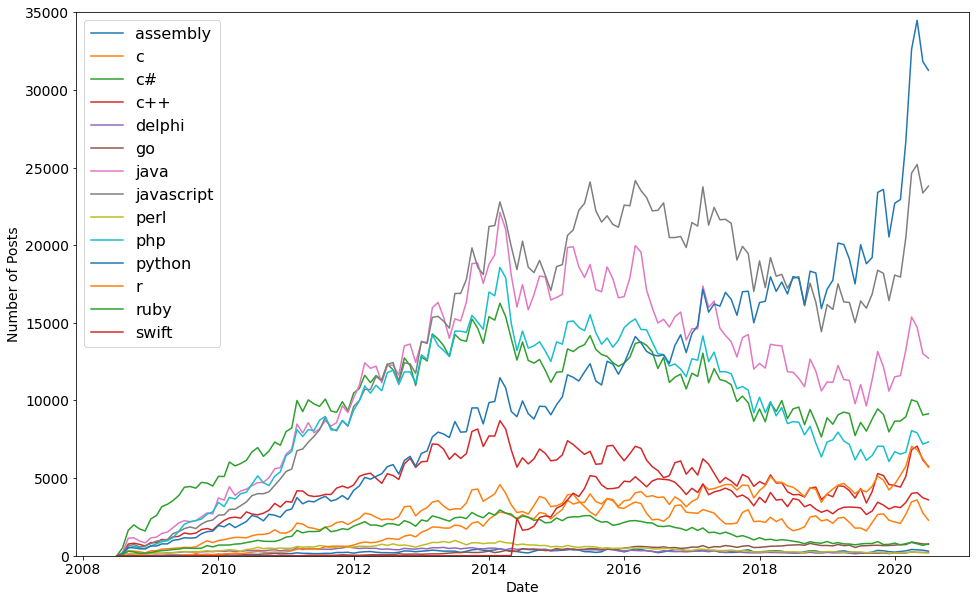

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df)
plt.legend(reshaped_df.columns,fontsize=16)